In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import skimage.io
from private_settings import DATA_PATH

## read segmentation file ##

In [2]:
df_train_ship_segmentation = pd.read_csv(DATA_PATH + "train_ship_segmentations_v2.csv", dtype = {'ImageId': 'string', 'EncodedPixels': 'string'})
df_train_ship_segmentation

,ImageId,EncodedPixels
0,00003e153.jpg,<NA>
1,0001124c7.jpg,<NA>
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
...,...,...
231718,fffedbb6b.jpg,<NA>
231719,ffff2aa57.jpg,<NA>
231720,ffff6e525.jpg,<NA>
231721,ffffc50b4.jpg,<NA>


## Get image sizes and list of corrupted images ##

In [3]:
CORRUPTED_IMAGE_IDS = []
size_counter = {}
for image_id in df_train_ship_segmentation['ImageId'].unique():
    try:
        size = skimage.io.imread(DATA_PATH + 'train_v2/' + image_id).shape
        if size not in size_counter:
            size_counter[size] = 0
        size_counter[size] += 1
    except:
        CORRUPTED_IMAGE_IDS.append(image_id)

In [4]:
CORRUPTED_IMAGE_IDS

['6384c3e78.jpg']

In [5]:
size_counter

{(768, 768, 3): 192555}

## Analising area of masks ##

In [6]:
area = df_train_ship_segmentation['EncodedPixels'][df_train_ship_segmentation['EncodedPixels'].notna()].apply(lambda x: np.array(x.split(), dtype = int)[1::2].sum())
area

2         3388
3          177
4          148
5          480
6            7
          ... 
231694     401
231709     902
231712      30
231713     128
231714    4476
Name: EncodedPixels, Length: 81723, dtype: int32

### Min, Median, Max ###

In [7]:
area.min(), area.median(), area.max()

(2, 408.0, 25904)

## Show example ##

In [8]:
def get_mask(encoded_pixels, shape = (768, 768)):
    mask = np.zeros(np.prod(shape), dtype = bool)
    for start, length in np.array(encoded_pixels.split(), dtype = int).reshape(-1, 2):
        mask[start : start + length] = 1
    return mask.reshape(shape).T

In [9]:
def get_multimask(image_id, shape = (768, 768)):
    s_encoded_pixels = df_train_ship_segmentation[df_train_ship_segmentation['ImageId'] == image_id]['EncodedPixels']
    s_encoded_pixels = s_encoded_pixels[s_encoded_pixels.notna()]
    mask = np.zeros(shape, dtype = np.int8)
    for i, encoded_pixels in zip(range(1, len(s_encoded_pixels) + 1), s_encoded_pixels):
        mask += get_mask(encoded_pixels, shape) * i
    return mask

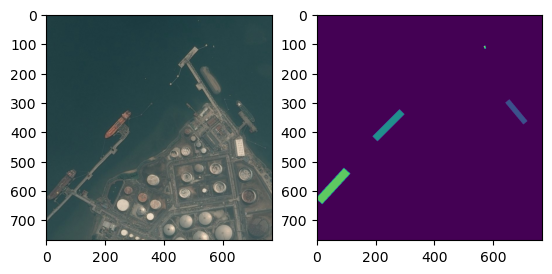

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
ax1.imshow(skimage.io.imread(DATA_PATH + 'train_v2/' + '0a286fb15.jpg'))
ax2.imshow(get_multimask('0a286fb15.jpg'))

<Axes: >

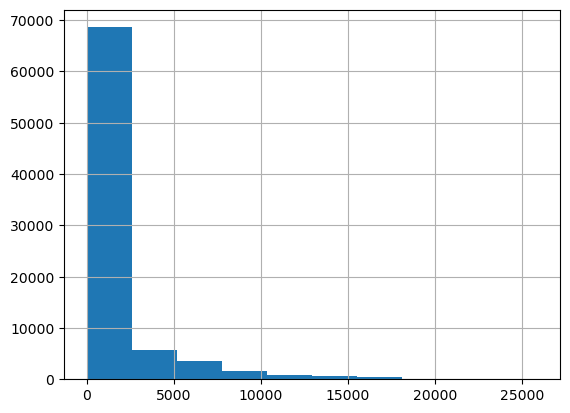

In [11]:
area.hist()